In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install openpyxl
# !pip install -U scikit-learn scipy matplotlib

# Exploaratory Data

Overview dataset and check number rows and columns in dataset

In [3]:
df = pd.read_excel("./dataset/datasetOptikRandom.xlsx")
df.head()

Kanal  spasi_kanal (GHz)  power (dBm)  panjang_kabel (Km)  \
0      8                200            2                  50   
1      4                200            2                  50   
2      4                200            2                  50   
3     16                200            5                  50   
4     16                200            2                  50   

   redaman (dBm/km)  frekuensi (THz)  osnr 1 (dB)  q_factor 1   Nilai BER 1  \
0               0.1            191.5        36.93       16.66  1.217760e-62   
1               0.0            191.5        36.93       16.65  1.388090e-62   
2               0.1            191.5        36.93       16.58  4.486180e-62   
3               0.0            191.5        36.91       16.51  1.551160e-61   
4               0.1            191.5        36.93       16.50  1.720510e-61   

  Kondisi BER    Level  
0        Baik  Optimal  
1        Baik  Optimal  
2        Baik  Optimal  
3        Baik  Optimal  
4        Baik  Optimal

In [4]:
df.shape

(900, 11)

Rename columns in dataset

In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.rename(columns={"osnr_1_(db)":"osnr_(db)",
                  "q_factor_1":"q_factor",
                  "nilai_ber_1":"nilai_ber"}, inplace=True)

In [6]:
df.head()

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
0      8                200            2                  50   
1      4                200            2                  50   
2      4                200            2                  50   
3     16                200            5                  50   
4     16                200            2                  50   

   redaman_(dbm/km)  frekuensi_(thz)  osnr_(db)  q_factor     nilai_ber  \
0               0.1            191.5      36.93     16.66  1.217760e-62   
1               0.0            191.5      36.93     16.65  1.388090e-62   
2               0.1            191.5      36.93     16.58  4.486180e-62   
3               0.0            191.5      36.91     16.51  1.551160e-61   
4               0.1            191.5      36.93     16.50  1.720510e-61   

  kondisi_ber    level  
0        Baik  Optimal  
1        Baik  Optimal  
2        Baik  Optimal  
3        Baik  Optimal  
4        Baik  Optimal

Descriptive statistic to check mean, count, standard devitiation, q1, q1 for numerical value

In [7]:
df.describe()

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
count  900.000000         900.000000   900.000000          900.000000   
mean     8.960000         125.000000     2.500000           58.666667   
std      5.097772          55.633674     1.708775            7.976607   
min      4.000000          50.000000     0.000000           50.000000   
25%      4.000000         100.000000     1.000000           50.000000   
50%      8.000000         125.000000     2.500000           60.000000   
75%     16.000000         150.000000     4.000000           70.000000   
max     16.000000         200.000000     5.000000           70.000000   

       redaman_(dbm/km)  frekuensi_(thz)   osnr_(db)    q_factor     nilai_ber  
count        900.000000            900.0  900.000000  900.000000  9.000000e+02  
mean           0.180000            191.5   31.821456    9.658111  2.271000e-08  
std            0.146141              0.0    5.885542    3.407319  1.105307e-07  
min            0.000000            191.5   21.910000    4.570000  1.217760e-62  
25%            0.100000            191.5   31.770000    7.330000  1.470750e-36  
50%            0.200000            191.5   31.985000    8.880000  5.745470e-19  
75%            0.300000            191.5   36.455000   12.577500  1.148067e-13  
max            0.500000            191.5   36.970000   16.660000  1.856940e-06

Checking the data type of each column, we found two object values

In [8]:
df.dtypes

kanal                   int64
spasi_kanal_(ghz)       int64
power_(dbm)             int64
panjang_kabel_(km)      int64
redaman_(dbm/km)      float64
frekuensi_(thz)       float64
osnr_(db)             float64
q_factor              float64
nilai_ber             float64
kondisi_ber            object
level                  object
dtype: object

Check missing value and duplucated in the dataset, we know that there is no missing value and duplcated data

In [9]:
df.isnull().sum()

kanal                 0
spasi_kanal_(ghz)     0
power_(dbm)           0
panjang_kabel_(km)    0
redaman_(dbm/km)      0
frekuensi_(thz)       0
osnr_(db)             0
q_factor              0
nilai_ber             0
kondisi_ber           0
level                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

check value of each category in column level

In [11]:
df["level"].value_counts()

level
Optimal        741
Repairing       80
Maintenance     79
Name: count, dtype: int64

In [12]:
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
0      8                 50            0                  50   
1      4                150            2                  70   
2      4                 50            3                  50   
3     16                 50            0                  50   
4     16                100            3                  60   

   redaman_(dbm/km)  frekuensi_(thz)  osnr_(db)  q_factor     nilai_ber  \
0               0.0            191.5      22.25      7.51  2.954850e-14   
1               0.2            191.5      36.41      7.62  1.311500e-14   
2               0.3            191.5      22.16      7.32  1.273600e-13   
3               0.1            191.5      22.10      7.43  5.470690e-14   
4               0.1            191.5      31.85      9.83  4.377560e-23   

  kondisi_ber    level  
0        Baik  Optimal  
1        Baik  Optimal  
2        Baik  Optimal  
3        Baik  Optimal  
4        Baik  Optimal

Check unique values in each columns

In [13]:
print("Nilai Unique Value Setiap Kolom\n")
for i in df.columns:
  print(f"{i} {df[i].nunique()}")

Nilai Unique Value Setiap Kolom

kanal 3
spasi_kanal_(ghz) 4
power_(dbm) 6
panjang_kabel_(km) 3
redaman_(dbm/km) 6
frekuensi_(thz) 1
osnr_(db) 88
q_factor 482
nilai_ber 894
kondisi_ber 4
level 3


Outlier Analysis

In [14]:
def check_outlier(col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1
  upper = 1.5 * iqr + q3
  lower = 1.5 * iqr - q1

  return df[(df[col] < lower) | (df[col] > upper)]

In [15]:
check_outlier("osnr_(db)")

Empty DataFrame
Columns: [kanal, spasi_kanal_(ghz), power_(dbm), panjang_kabel_(km), redaman_(dbm/km), frekuensi_(thz), osnr_(db), q_factor, nilai_ber, kondisi_ber, level]
Index: []

In [16]:
check_outlier("q_factor")

Empty DataFrame
Columns: [kanal, spasi_kanal_(ghz), power_(dbm), panjang_kabel_(km), redaman_(dbm/km), frekuensi_(thz), osnr_(db), q_factor, nilai_ber, kondisi_ber, level]
Index: []

In [17]:
check_outlier("nilai_ber")

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
0        8                 50            0                  50   
1        4                150            2                  70   
2        4                 50            3                  50   
3       16                 50            0                  50   
4       16                100            3                  60   
..     ...                ...          ...                 ...   
895      4                150            0                  60   
896     16                100            4                  50   
897     16                 50            2                  50   
898     16                150            3                  70   
899     16                 50            1                  60   

     redaman_(dbm/km)  frekuensi_(thz)  osnr_(db)  q_factor     nilai_ber  \
0                 0.0            191.5      22.25      7.51  2.954850e-14   
1                 0.2            191.5      36.41      7.62  1.311500e-14   
2                 0.3            191.5      22.16      7.32  1.273600e-13   
3                 0.1            191.5      22.10      7.43  5.470690e-14   
4                 0.1            191.5      31.85      9.83  4.377560e-23   
..                ...              ...        ...       ...           ...   
895               0.0            191.5      36.26     10.37  1.620970e-25   
896               0.2            191.5      31.94     13.03  4.329310e-39   
897               0.0            191.5      22.25      7.44  5.182560e-14   
898               0.2            191.5      36.37      7.49  3.504740e-14   
899               0.4            191.5      22.15      4.88  5.399830e-07   

    kondisi_ber      level  
0          Baik    Optimal  
1          Baik    Optimal  
2          Baik    Optimal  
3          Baik    Optimal  
4          Baik    Optimal  
..          ...        ...  
895        Baik    Optimal  
896        Baik    Optimal  
897        Baik    Optimal  
898        Baik    Optimal  
899       Buruk  Repairing  

[883 rows x 11 columns]

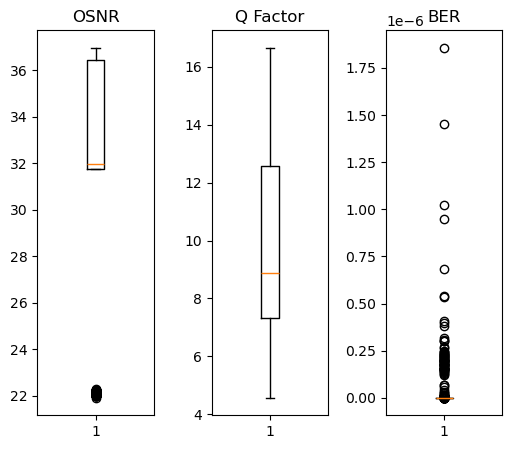

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(6, 5))

ax[0].boxplot(df["osnr_(db)"])
ax[1].boxplot(df["q_factor"])
ax[2].boxplot(df["nilai_ber"])

ax[0].set_title("OSNR")
ax[1].set_title("Q Factor")
ax[2].set_title("BER")

plt.subplots_adjust(wspace=0.5)

plt.show()

C:\Users\hanan\AppData\Local\Temp\ipykernel_6500\486263855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["nilai_ber"], kde=True)


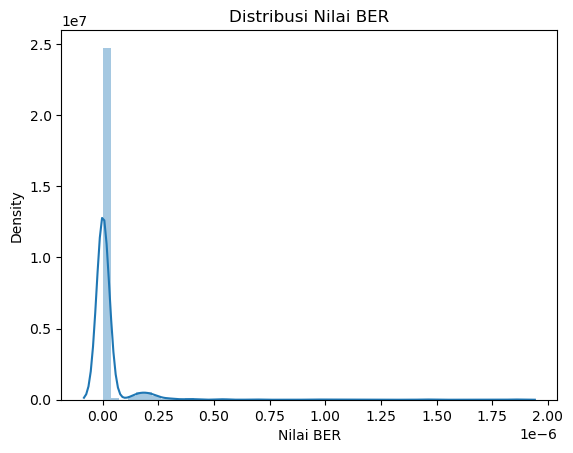

In [19]:
sns.distplot(x=df["nilai_ber"], kde=True)

plt.xlabel("Nilai BER")

plt.title("Distribusi Nilai BER")

plt.show()

In [20]:
df['level'].value_counts()

level
Optimal        741
Repairing       80
Maintenance     79
Name: count, dtype: int64

Categorical Encoding

In [21]:
df["level"] = df["level"].apply(lambda x: 0 if x == "Optimal" else 1 if x == "Maintenance" else 2)

In [22]:
df['level'].value_counts()

level
0    741
2     80
1     79
Name: count, dtype: int64

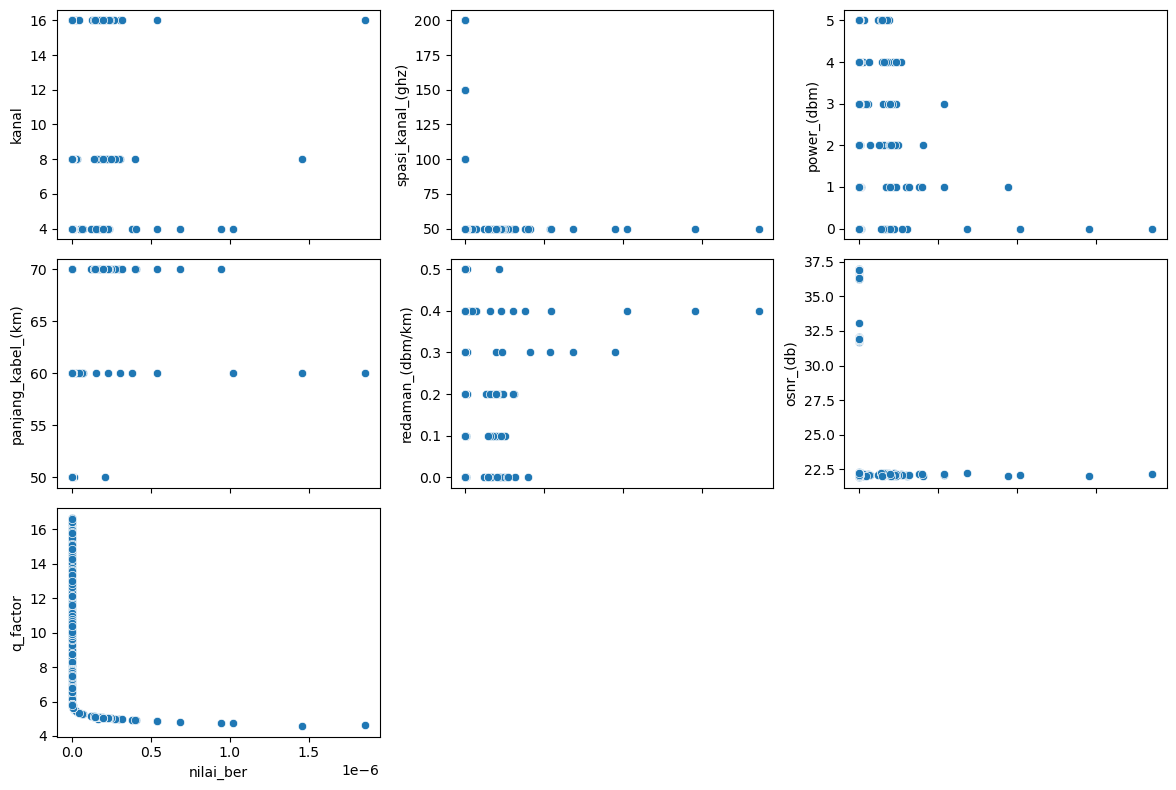

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 8), sharex=True)

sns.scatterplot(y='kanal', x="nilai_ber", data=df, ax=ax[0, 0])
sns.scatterplot(y='spasi_kanal_(ghz)', x="nilai_ber", data=df, ax=ax[0, 1])
sns.scatterplot(y='power_(dbm)', x="nilai_ber", data=df, ax=ax[0, 2])
sns.scatterplot(y='panjang_kabel_(km)', x="nilai_ber", data=df, ax=ax[1, 0])
sns.scatterplot(y='redaman_(dbm/km)', x="nilai_ber", data=df, ax=ax[1, 1])
sns.scatterplot(y='osnr_(db)', x="nilai_ber", data=df, ax=ax[1, 2])
sns.scatterplot(y='q_factor', x="nilai_ber", data=df, ax=ax[2, 0])

fig.delaxes(ax=ax[2, 1])
fig.delaxes(ax=ax[2, 2])

plt.tight_layout()

plt.show()

In [24]:
count_plot = ["kanal", "spasi_kanal_(ghz)",	"power_(dbm)",	"panjang_kabel_(km)",	"redaman_(dbm/km)",	"kondisi_ber",	"level"]

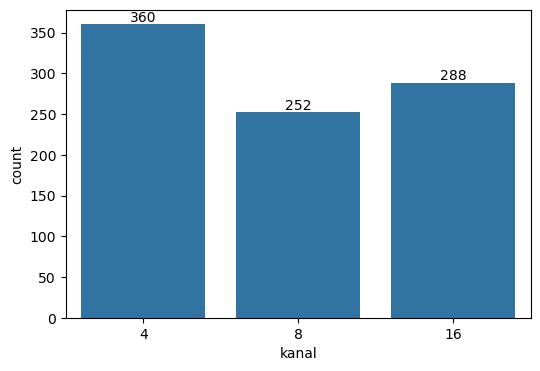

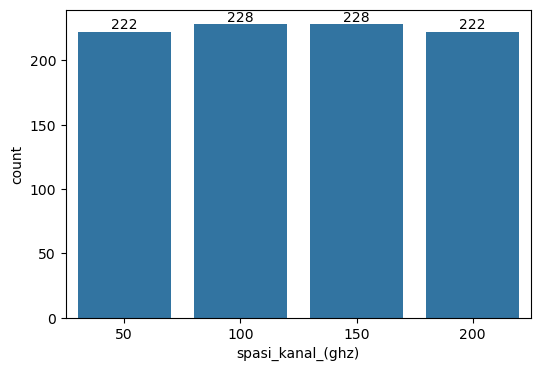

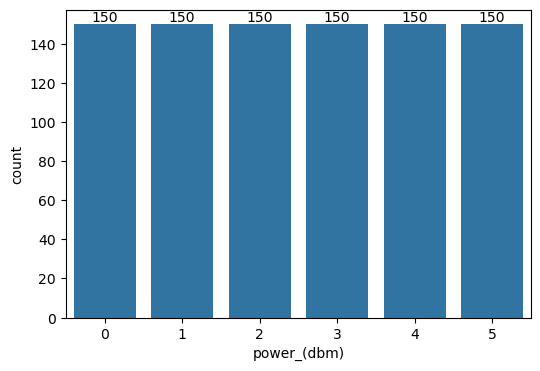

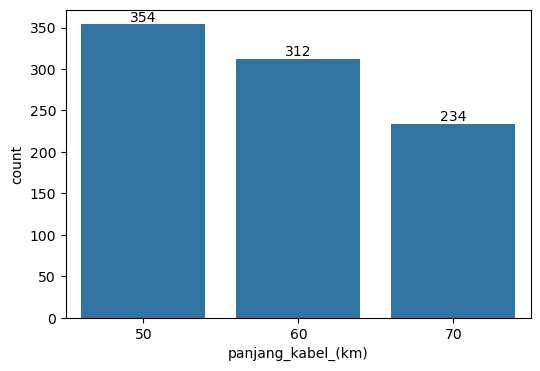

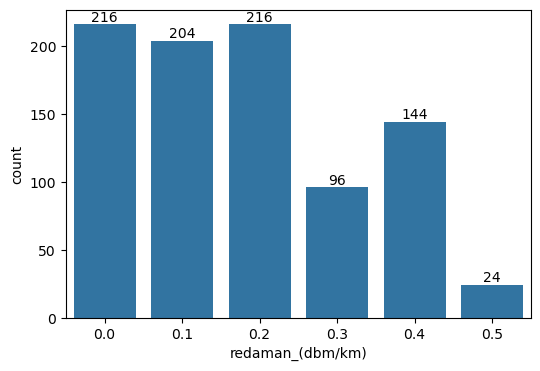

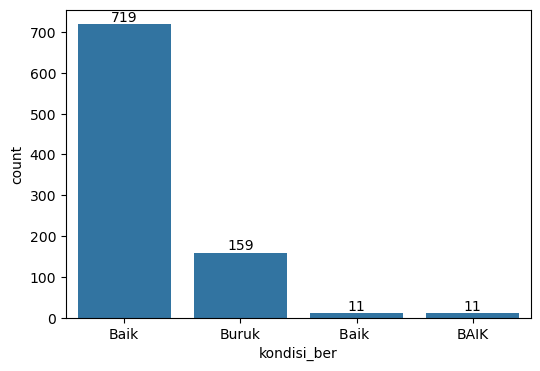

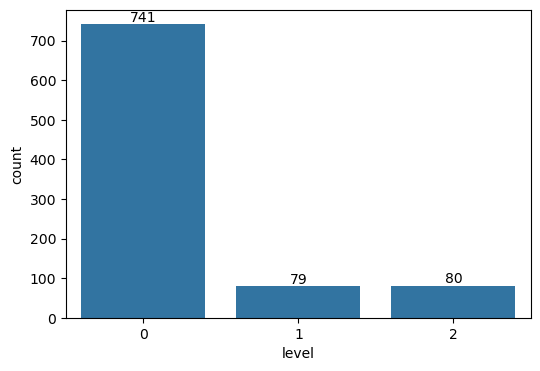

In [25]:
for i in count_plot:
  plt.figure(figsize=(6,4))
  c = sns.countplot(x = df[i])
  for i in c.containers:
    c.bar_label(i)

plt.show()

# Feature Selection

In [29]:
df.drop(columns=["frekuensi_(thz)", "nilai_ber", "kondisi_ber"], axis=1, inplace=True)

KeyError: "['frekuensi_(thz)', 'nilai_ber', 'kondisi_ber'] not found in axis"

In [30]:
df.corr()

kanal  spasi_kanal_(ghz)   power_(dbm)  \
kanal               1.000000e+00       1.034476e-16 -3.198339e-17   
spasi_kanal_(ghz)   1.034476e-16       1.000000e+00 -3.192561e-17   
power_(dbm)        -3.198339e-17      -3.192561e-17  1.000000e+00   
panjang_kabel_(km) -2.100888e-02      -2.255937e-02 -8.933558e-17   
redaman_(dbm/km)   -1.032031e-01       1.458187e-17 -3.956261e-17   
osnr_(db)           2.581205e-03       9.182772e-01  4.311879e-03   
q_factor            5.012695e-02       5.478448e-01  5.430541e-02   
level              -2.908777e-02      -5.359159e-01 -5.380958e-02   

                    panjang_kabel_(km)  redaman_(dbm/km)  osnr_(db)  q_factor  \
kanal                    -2.100888e-02     -1.032031e-01   0.002581  0.050127   
spasi_kanal_(ghz)        -2.255937e-02      1.458187e-17   0.918277  0.547845   
power_(dbm)              -8.933558e-17     -3.956261e-17   0.004312  0.054305   
panjang_kabel_(km)        1.000000e+00     -2.519157e-01  -0.022044 -0.667906   
redaman_(dbm/km)         -2.519157e-01      1.000000e+00   0.003058 -0.060826   
osnr_(db)                -2.204366e-02      3.057506e-03   1.000000  0.610724   
q_factor                 -6.679059e-01     -6.082588e-02   0.610724  1.000000   
level                     3.329591e-01      3.339005e-02  -0.654866 -0.547833   

                       level  
kanal              -0.029088  
spasi_kanal_(ghz)  -0.535916  
power_(dbm)        -0.053810  
panjang_kabel_(km)  0.332959  
redaman_(dbm/km)    0.033390  
osnr_(db)          -0.654866  
q_factor           -0.547833  
level               1.000000

In [31]:
# !pip install seaborn --upgrade

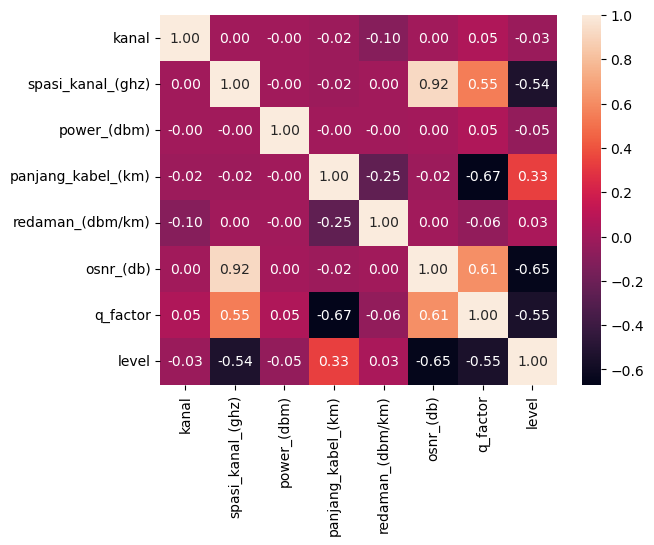

In [32]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

plt.show()

In [34]:
df.corr()["level"].sort_values(ascending=False)

level                 1.000000
panjang_kabel_(km)    0.332959
redaman_(dbm/km)      0.033390
kanal                -0.029088
power_(dbm)          -0.053810
spasi_kanal_(ghz)    -0.535916
q_factor             -0.547833
osnr_(db)            -0.654866
Name: level, dtype: float64

In [16]:
# df_final = df[["spasi_kanal_(ghz)", "panjang_kabel_(km)", "osnr_(db)", "q_factor", "level"]]

In [17]:
# df_final.head()

# Build Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop("level", axis=1)
y = df["level"]

In [19]:
X

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
0        8                150            4                  50   
1       16                200            0                  50   
2       16                150            5                  50   
3        8                150            1                  50   
4        4                100            5                  70   
..     ...                ...          ...                 ...   
895     16                200            5                  70   
896     16                 50            4                  50   
897     16                150            2                  50   
898     16                 50            1                  50   
899     16                 50            1                  60   

     redaman_(dbm/km)  osnr_(db)  q_factor  
0                 0.1      36.31     15.69  
1                 0.4      36.93     11.56  
2                 0.2      36.40     15.57  
3                 0.2      36.28     15.35  
4                 0.3      31.91      7.34  
..                ...        ...       ...  
895               0.1      36.91      7.89  
896               0.1      22.13      7.58  
897               0.1      36.28     15.52  
898               0.0      22.19      7.52  
899               0.0      22.18      5.83  

[900 rows x 7 columns]

In [20]:
y.value_counts()

level
0    741
2     80
1     79
Name: count, dtype: int64

In [21]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [22]:
X

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
0         8                150            4                  50   
1        16                200            0                  50   
2        16                150            5                  50   
3         8                150            1                  50   
4         4                100            5                  70   
...     ...                ...          ...                 ...   
2218      8                 50            2                  70   
2219      8                 50            4                  70   
2220      4                 50            5                  70   
2221      4                 50            5                  70   
2222      4                 50            0                  51   

      redaman_(dbm/km)  osnr_(db)   q_factor  
0             0.100000  36.310000  15.690000  
1             0.400000  36.930000  11.560000  
2             0.200000  36.400000  15.570000  
3             0.200000  36.280000  15.350000  
4             0.300000  31.910000   7.340000  
...                ...        ...        ...  
2218          0.100000  22.029671   5.065165  
2219          0.200000  22.127789   5.053869  
2220          0.093480  22.094674   5.160652  
2221          0.077318  22.093866   5.162268  
2222          0.466593  22.061692   5.148528  

[2223 rows x 7 columns]

In [23]:
y.value_counts()

level
0    741
1    741
2    741
Name: count, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, make_scorer

from keras.models import Sequential
from keras.layers import Dense

In [359]:
# !pip install tensorflow
# !pip install xgboost

## Test 10

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
X_train

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
188       4                150            3                  70   
1414      4                 50            1                  60   
1523     16                 50            0                  60   
1672     16                 50            2                  70   
416       8                 50            4                  50   
...     ...                ...          ...                 ...   
1638     16                 50            4                  70   
1095      4                 50            5                  60   
1130      4                200            0                  65   
1294     16                 50            2                  60   
860       8                150            5                  60   

      redaman_(dbm/km)  osnr_(db)   q_factor  
188           0.200000  36.330000   7.680000  
1414          0.053563  22.174644   5.702678  
1523          0.100000  22.054888   5.785488  
1672          0.200000  22.130000   5.070000  
416           0.200000  22.110000   7.500000  
...                ...        ...        ...  
1638          0.118620  22.133724   5.131862  
1095          0.226623  22.092013   5.852045  
1130          0.345067  36.898027   6.533240  
1294          0.091845  22.129399   5.794292  
860           0.200000  36.350000  10.300000  

[2000 rows x 7 columns]

In [27]:
X_test

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
96        4                 50            1                  70   
1401      4                 50            4                  60   
1994      4                 50            3                  70   
1987      8                 50            3                  70   
859      16                 50            1                  70   
...     ...                ...          ...                 ...   
2198     16                 50            1                  70   
528       8                150            4                  60   
1615      4                 50            2                  60   
605       8                100            1                  70   
1773      4                 50            3                  70   

      redaman_(dbm/km)  osnr_(db)   q_factor  
96            0.100000  22.220000   5.100000  
1401          0.063363  22.098018   5.778513  
1994          0.300000  22.075257   4.890513  
1987          0.158019  22.132099   5.073703  
859           0.100000  22.220000   5.100000  
...                ...        ...        ...  
2198          0.058223  22.190756   5.120888  
528           0.000000  36.310000  10.410000  
1615          0.400000  22.154824   5.172877  
605           0.000000  31.850000   7.270000  
1773          0.153849  22.040770   5.011536  

[223 rows x 7 columns]

In [28]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [29]:
X_train

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
188       4                150            3                  70   
1414      4                 50            1                  60   
1523     16                 50            0                  60   
1672     16                 50            2                  70   
416       8                 50            4                  50   
...     ...                ...          ...                 ...   
1638     16                 50            4                  70   
1095      4                 50            5                  60   
1130      4                200            0                  65   
1294     16                 50            2                  60   
860       8                150            5                  60   

      redaman_(dbm/km)  osnr_(db)   q_factor  
188           0.200000  36.330000   7.680000  
1414          0.053563  22.174644   5.702678  
1523          0.100000  22.054888   5.785488  
1672          0.200000  22.130000   5.070000  
416           0.200000  22.110000   7.500000  
...                ...        ...        ...  
1638          0.118620  22.133724   5.131862  
1095          0.226623  22.092013   5.852045  
1130          0.345067  36.898027   6.533240  
1294          0.091845  22.129399   5.794292  
860           0.200000  36.350000  10.300000  

[2000 rows x 7 columns]

In [30]:
X_test

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
96        4                 50            1                  70   
1401      4                 50            4                  60   
1994      4                 50            3                  70   
1987      8                 50            3                  70   
859      16                 50            1                  70   
...     ...                ...          ...                 ...   
2198     16                 50            1                  70   
528       8                150            4                  60   
1615      4                 50            2                  60   
605       8                100            1                  70   
1773      4                 50            3                  70   

      redaman_(dbm/km)  osnr_(db)   q_factor  
96            0.100000  22.220000   5.100000  
1401          0.063363  22.098018   5.778513  
1994          0.300000  22.075257   4.890513  
1987          0.158019  22.132099   5.073703  
859           0.100000  22.220000   5.100000  
...                ...        ...        ...  
2198          0.058223  22.190756   5.120888  
528           0.000000  36.310000  10.410000  
1615          0.400000  22.154824   5.172877  
605           0.000000  31.850000   7.270000  
1773          0.153849  22.040770   5.011536  

[223 rows x 7 columns]

### KNeighbors

In [31]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       0.99      1.00      0.99        70
           2       1.00      0.99      0.99        72

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [33]:
print(accuracy_score(y_train, knn.predict(X_train)))

0.9915


In [34]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.995
Accuracy: 0.996
Recall 0.995
Precision 0.995


### Decision Tree

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        72

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [37]:
print("F1 Score:",round(f1_score(y_test, y_pred_dtc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_dtc),3))
print("Recall", round(recall_score(y_test, y_pred_dtc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_dtc, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        72

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [40]:
print("F1 Score:",round(f1_score(y_test, y_pred_rf, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_rf),3))
print("Recall", round(recall_score(y_test, y_pred_rf, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_rf, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Gradient Boosting

In [41]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        72

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [43]:
print("F1 Score:",round(f1_score(y_test, y_pred_gb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_gb),3))
print("Recall", round(recall_score(y_test, y_pred_gb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_gb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### XGB

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.97      0.99        70
           2       0.97      1.00      0.99        72

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223



In [46]:
print("F1 Score:",round(f1_score(y_test, y_pred_xgb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_xgb),3))
print("Recall", round(recall_score(y_test, y_pred_xgb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_xgb, average='macro'),3))

F1 Score: 0.991
Accuracy: 0.991
Recall 0.99
Precision 0.991


### Support Vector

In [47]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        81
           1       0.89      0.77      0.82        70
           2       1.00      0.85      0.92        72

    accuracy                           0.88       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.88      0.88       223



In [49]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.877
Accuracy: 0.879
Recall 0.873
Precision 0.896


### Naive Bayes

In [50]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [51]:
print(y_pred_nb)

[2 1 2 2 2 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 0 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 0 2 0 0 0 2 2 0 2 2 1 1 2 1 0 2 1 1 0 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 1 0 1 1 1 2 0 1 2 0 0 2 2 2 0 0 0 1 1 0 0 1 1 0 0 1 0 2 1 2 0
 0 2 2 1 0 0 2 2 1 2 2 1 1 0 2 0 1 0 0 2 1 1 0 0 2 1 0 0 2 0 1 2 1 0 2 1 2
 2 1 1 1 1 1 0 0 2 1 1 2 1 2 0 0 2 0 1 2 1 1 2 2 1 1 1 0 0 0 1 2 1 1 2 1 0
 2 0 0 0 2 1 1 2 0 0 1 0 0 2 0 1 2 2 2 0 2 1 2 1 2 1 1 2 0 1 0 0 1 2 0 1 0
 2]


In [52]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       0.86      0.89      0.87        70
           2       0.91      0.86      0.89        72

    accuracy                           0.92       223
   macro avg       0.92      0.92      0.92       223
weighted avg       0.92      0.92      0.92       223



In [53]:
print("F1 Score:",round(f1_score(y_test, y_pred_nb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_nb),3))
print("Recall", round(recall_score(y_test, y_pred_nb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_nb, average='macro'),3))

F1 Score: 0.916
Accuracy: 0.919
Recall 0.916
Precision 0.916


In [54]:
X.shape[1]

7

In [55]:
y_train.shape

(2000,)

### Logistic Regression Multinomial

In [60]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        81
           1       0.79      0.96      0.86        70
           2       1.00      0.90      0.95        72

    accuracy                           0.91       223
   macro avg       0.92      0.91      0.91       223
weighted avg       0.92      0.91      0.91       223



In [62]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.908
Accuracy: 0.906
Recall 0.908
Precision 0.916


### ANN

In [391]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [392]:
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [393]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6345 - loss: 1.6826
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - loss: 0.3953
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8388 - loss: 0.3395
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8483 - loss: 0.3314
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8465 - loss: 0.3131
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8807 - loss: 0.2637
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.2735
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8953 - loss: 0.2533
Epoch 9/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.2627
Epoch 10/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8953 - loss: 0.2271
Epoch 11/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9169 - loss: 0.1963
Epoch 12/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [394]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [395]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.955
Accuracy: 0.955
Recall 0.957
Precision 0.956


## Test 20

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
23        4                 50            3                  60   
1903      8                 50            4                  70   
427      16                200            4                  50   
554       4                100            1                  70   
1767      4                 50            4                  70   
...     ...                ...          ...                 ...   
1638     16                 50            4                  70   
1095      4                 50            5                  60   
1130      4                200            0                  65   
1294     16                 50            2                  60   
860       8                150            5                  60   

      redaman_(dbm/km)  osnr_(db)   q_factor  
23            0.400000  22.140000   5.310000  
1903          0.100000  22.130000   5.090262  
427           0.300000  36.900000  15.270000  
554           0.200000  31.840000   7.260000  
1767          0.197665  22.139766   5.075817  
...                ...        ...        ...  
1638          0.118620  22.133724   5.131862  
1095          0.226623  22.092013   5.852045  
1130          0.345067  36.898027   6.533240  
1294          0.091845  22.129399   5.794292  
860           0.200000  36.350000  10.300000  

[1778 rows x 7 columns]

### KNeighbors

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.98      0.99      0.99       134
           2       1.00      0.99      0.99       152

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In [67]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.991
Accuracy: 0.991
Recall 0.991
Precision 0.991


### Decision Tree

In [68]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       152

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [70]:
print("F1 Score:",round(f1_score(y_test, y_pred_dtc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_dtc),3))
print("Recall", round(recall_score(y_test, y_pred_dtc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_dtc, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Random Forest

In [71]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       152

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [73]:
print("F1 Score:",round(f1_score(y_test, y_pred_rf, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_rf),3))
print("Recall", round(recall_score(y_test, y_pred_rf, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_rf, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Gradient Boosting

In [74]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       152

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [76]:
print("F1 Score:",round(f1_score(y_test, y_pred_gb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_gb),3))
print("Recall", round(recall_score(y_test, y_pred_gb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_gb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### XGB

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       152

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [79]:
print("F1 Score:",round(f1_score(y_test, y_pred_xgb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_xgb),3))
print("Recall", round(recall_score(y_test, y_pred_xgb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_xgb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Support Vector

In [80]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       159
           1       0.79      0.79      0.79       134
           2       1.00      0.78      0.87       152

    accuracy                           0.86       445
   macro avg       0.87      0.86      0.86       445
weighted avg       0.87      0.86      0.86       445



In [82]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.856
Accuracy: 0.861
Recall 0.856
Precision 0.872


### Naive Bayes

In [83]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.80      0.90      0.85       134
           2       0.92      0.81      0.86       152

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.91      0.90      0.90       445



In [85]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.991
Accuracy: 0.991
Recall 0.991
Precision 0.991


### Logistic Regression Multinomial

In [86]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       159
           1       0.81      0.96      0.88       134
           2       1.00      0.95      0.97       152

    accuracy                           0.92       445
   macro avg       0.93      0.92      0.92       445
weighted avg       0.93      0.92      0.92       445



In [88]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.921
Accuracy: 0.921
Recall 0.924
Precision 0.925


### ANN

In [419]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [420]:
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)               │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [421]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5468 - loss: 0.8810
Epoch 2/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6712 - loss: 0.6650
Epoch 3/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7452 - loss: 0.5673
Epoch 4/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7619 - loss: 0.5027
Epoch 5/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8088 - loss: 0.4578
Epoch 6/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.4015
Epoch 7/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8518 - loss: 0.3709
Epoch 8/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8508 - loss: 0.3355
Epoch 9/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8550 - loss: 0.3335
Epoch 10/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.2990
Epoch 11/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 0.2899
Epoch 12/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [422]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [423]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.909
Accuracy: 0.91
Recall 0.909
Precision 0.912


## Test 30

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X_train

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
2218      8                 50            2                  70   
1580     16                 50            1                  60   
677       4                 50            0                  50   
1752     16                 50            1                  70   
318       4                 50            0                  50   
...     ...                ...          ...                 ...   
1638     16                 50            4                  70   
1095      4                 50            5                  60   
1130      4                200            0                  65   
1294     16                 50            2                  60   
860       8                150            5                  60   

      redaman_(dbm/km)  osnr_(db)   q_factor  
2218          0.100000  22.029671   5.065165  
1580          0.400000  22.143670   4.905321  
677           0.400000  22.150000   6.770000  
1752          0.127688  22.195081   5.091694  
318           0.500000  22.050000   5.060000  
...                ...        ...        ...  
1638          0.118620  22.133724   5.131862  
1095          0.226623  22.092013   5.852045  
1130          0.345067  36.898027   6.533240  
1294          0.091845  22.129399   5.794292  
860           0.200000  36.350000  10.300000  

[1556 rows x 7 columns]

### KNeighbors

In [91]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       230
           1       0.96      1.00      0.98       204
           2       1.00      0.98      0.99       233

    accuracy                           0.99       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.99      0.99      0.99       667



In [93]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.985
Accuracy: 0.985
Recall 0.985
Precision 0.984


### Decision Tree

In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       233

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [96]:
print("F1 Score:",round(f1_score(y_test, y_pred_dtc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_dtc),3))
print("Recall", round(recall_score(y_test, y_pred_dtc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_dtc, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Random Forest

In [97]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       233

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [99]:
print("F1 Score:",round(f1_score(y_test, y_pred_rf, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_rf),3))
print("Recall", round(recall_score(y_test, y_pred_rf, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_rf, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Gradient Boosting

In [100]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       233

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [102]:
print("F1 Score:",round(f1_score(y_test, y_pred_gb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_gb),3))
print("Recall", round(recall_score(y_test, y_pred_gb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_gb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### XGB

In [103]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [104]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       233

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [105]:
print("F1 Score:",round(f1_score(y_test, y_pred_xgb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_xgb),3))
print("Recall", round(recall_score(y_test, y_pred_xgb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_xgb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Support Vector

In [106]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       230
           1       0.75      0.78      0.77       204
           2       1.00      0.73      0.84       233

    accuracy                           0.84       667
   macro avg       0.85      0.84      0.83       667
weighted avg       0.86      0.84      0.84       667



In [108]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.834
Accuracy: 0.838
Recall 0.837
Precision 0.853


### Naive Bayes

In [109]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.80      0.87      0.83       204
           2       0.90      0.82      0.86       233

    accuracy                           0.89       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.90      0.89      0.89       667



In [111]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.985
Accuracy: 0.985
Recall 0.985
Precision 0.984


### Logistic Regression Multinomial

In [112]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       230
           1       0.77      0.96      0.85       204
           2       1.00      0.89      0.94       233

    accuracy                           0.90       667
   macro avg       0.91      0.90      0.90       667
weighted avg       0.91      0.90      0.90       667



In [114]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.9
Accuracy: 0.9
Recall 0.902
Precision 0.909


### ANN

In [447]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [448]:
model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)               │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [449]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4909 - loss: 1.2554
Epoch 2/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7395 - loss: 0.6153
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.5145
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4616
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4359
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3618
Epoch 7/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 0.3576
Epoch 8/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8554 - loss: 0.3519
Epoch 9/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8841 - loss: 0.3086
Epoch 10/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3167
Epoch 11/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3152
Epoch 12/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [450]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [451]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.912
Accuracy: 0.913
Recall 0.913
Precision 0.914


## Test 40

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [119]:
X_train

kanal  spasi_kanal_(ghz)  power_(dbm)  panjang_kabel_(km)  \
1618      4                 50            3                  70   
1071      8                 50            4                  60   
1541      8                 50            4                  60   
1179     16                 50            0                  60   
609       4                100            2                  50   
...     ...                ...          ...                 ...   
1638     16                 50            4                  70   
1095      4                 50            5                  60   
1130      4                200            0                  65   
1294     16                 50            2                  60   
860       8                150            5                  60   

      redaman_(dbm/km)  osnr_(db)   q_factor  
1618          0.137244  22.056071   5.052551  
1071          0.000000  22.122880   5.848479  
1541          0.189053  22.096716   5.775621  
1179          0.179429  22.042057   5.790000  
609           0.200000  31.890000  13.010000  
...                ...        ...        ...  
1638          0.118620  22.133724   5.131862  
1095          0.226623  22.092013   5.852045  
1130          0.345067  36.898027   6.533240  
1294          0.091845  22.129399   5.794292  
860           0.200000  36.350000  10.300000  

[1333 rows x 7 columns]

### KNeighbors

In [120]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       305
           1       0.96      0.99      0.97       279
           2       1.00      0.99      0.99       306

    accuracy                           0.98       890
   macro avg       0.98      0.98      0.98       890
weighted avg       0.98      0.98      0.98       890



In [122]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.983
Accuracy: 0.983
Recall 0.983
Precision 0.983


### Decision Tree

In [123]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00       306

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



In [125]:
print("F1 Score:",round(f1_score(y_test, y_pred_dtc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_dtc),3))
print("Recall", round(recall_score(y_test, y_pred_dtc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_dtc, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Random Forest

In [126]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00       306

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



In [128]:
print("F1 Score:",round(f1_score(y_test, y_pred_rf, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_rf),3))
print("Recall", round(recall_score(y_test, y_pred_rf, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_rf, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### Gradient Boosting

In [129]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00       306

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



In [131]:
print("F1 Score:",round(f1_score(y_test, y_pred_gb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_gb),3))
print("Recall", round(recall_score(y_test, y_pred_gb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_gb, average='macro'),3))

F1 Score: 1.0
Accuracy: 1.0
Recall 1.0
Precision 1.0


### XGB

In [132]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       0.99      1.00      1.00       279
           2       1.00      0.99      1.00       306

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



In [134]:
print("F1 Score:",round(f1_score(y_test, y_pred_xgb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_xgb),3))
print("Recall", round(recall_score(y_test, y_pred_xgb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_xgb, average='macro'),3))

F1 Score: 0.998
Accuracy: 0.998
Recall 0.998
Precision 0.998


### Support Vector

In [135]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [136]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       305
           1       0.75      0.80      0.77       279
           2       1.00      0.72      0.84       306

    accuracy                           0.84       890
   macro avg       0.86      0.84      0.84       890
weighted avg       0.86      0.84      0.84       890



In [137]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.836
Accuracy: 0.839
Recall 0.838
Precision 0.855


### Naive Bayes

In [138]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       305
           1       0.82      0.89      0.85       279
           2       0.90      0.84      0.87       306

    accuracy                           0.90       890
   macro avg       0.90      0.90      0.90       890
weighted avg       0.91      0.90      0.90       890



In [140]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.983
Accuracy: 0.983
Recall 0.983
Precision 0.983


### Logistic Regression Multinomial

In [141]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       305
           1       0.79      0.96      0.87       279
           2       0.99      0.91      0.95       306

    accuracy                           0.91       890
   macro avg       0.92      0.91      0.91       890
weighted avg       0.92      0.91      0.91       890



In [143]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.907
Accuracy: 0.907
Recall 0.908
Precision 0.916


### ANN

In [475]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\hanan\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [476]:
model.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_171 (Dense)               │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [477]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5234 - loss: 1.0113
Epoch 2/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7489 - loss: 0.5879
Epoch 3/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7927 - loss: 0.4999
Epoch 4/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4507
Epoch 5/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8300 - loss: 0.4256
Epoch 6/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8191 - loss: 0.4145
Epoch 7/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8454 - loss: 0.3685
Epoch 8/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8596 - loss: 0.3558
Epoch 9/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8505 - loss: 0.3341
Epoch 10/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8595 - loss: 0.3341
Epoch 11/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8719 - loss: 0.3153
Epoch 12/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [478]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [479]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='micro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.858
Accuracy: 0.858
Recall 0.858
Precision 0.872
